# Task1
## Part 1

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
from google.colab import drive
warnings.filterwarnings("ignore")

from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM

import gensim
import spacy
from gensim.models import Word2Vec
import nltk
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# upload and read the file
# https://www.kaggle.com/datasets/rahulsah06/gooogle-stock-price?select=Google_Stock_Price_Train.csv

drive.mount('/content/drive', force_remount=True)
raw_data = pd.read_csv('drive/MyDrive/datasets/Google_Stock_Price_Train.csv', sep=",")

Mounted at /content/drive


In [ ]:
data = raw_data
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [ ]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
data.loc[:,["Open"]].values
data = data.loc[:,["Open"]].values
train = data[:math.floor(len(data) * 0.8)] 
val = data[len(train):len(train) + math.floor(len(data) * 0.1)]
test = data[:math.floor(len(data) * 0.1)]
train=train.reshape(train.shape[0],1)
val=val.reshape(val.shape[0],1)
sc=MinMaxScaler(feature_range=(0,1))
data_scaled = sc.fit_transform(train)

In [ ]:
def data_split(data, days):
  X = [];
  y = []
  for i in range(days, data.shape[0]):
    X.append(data_scaled[i-days:i,0])
    y.append(data_scaled[i,0])
  return np.array(X), np.array(y)

In [ ]:
X_train, y_train = data_split(train, 30)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val, y_val = data_split(val, 30)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test, y_test = data_split(test, 30)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# The two RNN layers each have 30 units. The activation function for both is tanh.
# The output layer has 1 unit, and doesn't have an activation function (linear).

regressor = Sequential()
regressor.add(SimpleRNN(units=30, activation='tanh', return_sequences = True))
regressor.add(SimpleRNN(units=30, activation='tanh', return_sequences = True))
regressor.add(Dense(units=1))
regressor.compile(loss="mean_squared_error")
history = regressor.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
31/31 [==============================] - 3s 20ms/step - loss: 0.1562 - val_loss: 0.0803
Epoch 2/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0684 - val_loss: 0.0974
Epoch 3/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0649 - val_loss: 0.2102
Epoch 4/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0632 - val_loss: 0.1146
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0621 - val_loss: 0.0995
Epoch 6/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0600 - val_loss: 0.0947
Epoch 7/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0598 - val_loss: 0.0748
Epoch 8/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0601 - val_loss: 0.0844
Epoch 9/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0593 - val_loss: 0.1697
Epoch 10/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0592 - val_loss: 0.1222
Epoch 11/

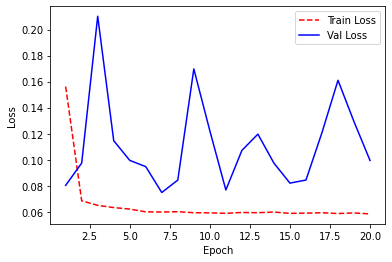

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
X_test = []
for i in range(0, test.shape[0] - 30):
  X_test.append(test[i:i + 30, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)
print(y_test.shape)

(95, 30, 1)
(95,)


In [ ]:
# Performance measurement
prediction = regressor.predict(X_test)
prediction = prediction[:, 0, :]
prediction.shape
# The metric I choose to use to measure performance is the mean squared error.
math.sqrt(mean_squared_error(y_test, prediction))

3/3 [==============================] - 0s 5ms/step


0.56199668526349

## Part 2

In [ ]:
# There is one single layer of LSTM. It has 5 units. The activation function is default to tanh, and the recurrent activation function is default to sigmoid.
# The output layer has 1 unit, and doesn't have an activation function (linear).

regressor_lstm = Sequential()
regressor_lstm.add(LSTM(5))
regressor_lstm.add(Dense(units=1))
regressor_lstm.compile(loss="mean_squared_error")
history = regressor_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
31/31 [==============================] - 4s 40ms/step - loss: 0.0724 - val_loss: 0.0093
Epoch 2/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0149 - val_loss: 0.0223
Epoch 3/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0054 - val_loss: 0.0086
Epoch 4/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 7.0088e-04
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 6.9824e-04 - val_loss: 3.7994e-04
Epoch 6/20
31/31 [==============================] - 0s 10ms/step - loss: 6.5861e-04 - val_loss: 2.1032e-04
Epoch 7/20
31/31 [==============================] - 0s 11ms/step - loss: 6.5282e-04 - val_loss: 3.1766e-04
Epoch 8/20
31/31 [==============================] - 0s 11ms/step - loss: 6.4938e-04 - val_loss: 3.0077e-04
Epoch 9/20
31/31 [==============================] - 0s 9ms/step - loss: 6.3824e-04 - val_loss: 2.2926e-04
Epoch 10/20
31/31 [==============================] - 0s 11ms/step -

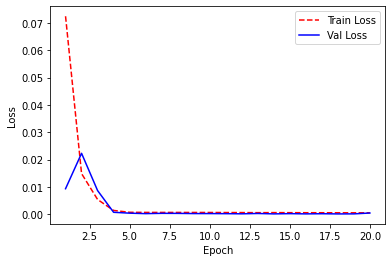

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
prediction_lstm = regressor_lstm.predict(X_test)
prediction_lstm.shape
math.sqrt(mean_squared_error(y_test, prediction))

3/3 [==============================] - 0s 4ms/step


0.56199668526349

In [ ]:
# There is one single layer of GRU. It has 5 units. The activation function is default to tanh, and the recurrent activation function is default to sigmoid.
# The output layer has 1 unit, and doesn't have an activation function (linear).

regressor_gru = Sequential()
regressor_gru.add(GRU(5))
regressor_gru.add(Dense(units=1))
regressor_gru.compile(loss="mean_squared_error")
history = regressor_gru.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
31/31 [==============================] - 4s 34ms/step - loss: 0.1914 - val_loss: 0.0200
Epoch 2/20
31/31 [==============================] - 1s 16ms/step - loss: 0.0774 - val_loss: 0.0716
Epoch 3/20
31/31 [==============================] - 1s 16ms/step - loss: 0.0419 - val_loss: 0.0949
Epoch 4/20
31/31 [==============================] - 0s 15ms/step - loss: 0.0305 - val_loss: 0.0619
Epoch 5/20
31/31 [==============================] - 0s 15ms/step - loss: 0.0205 - val_loss: 0.0409
Epoch 6/20
31/31 [==============================] - 0s 16ms/step - loss: 0.0116 - val_loss: 0.0173
Epoch 7/20
31/31 [==============================] - 1s 16ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 8/20
31/31 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 4.3880e-04
Epoch 9/20
31/31 [==============================] - 0s 15ms/step - loss: 4.1972e-04 - val_loss: 2.0573e-04
Epoch 10/20
31/31 [==============================] - 0s 15ms/step - loss: 4.1972e-04 - val_loss: 

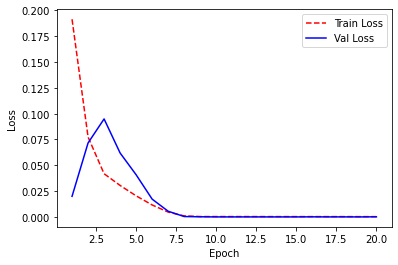

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
prediction_gru = regressor_gru.predict(X_test)
prediction_gru.shape
math.sqrt(mean_squared_error(y_test, prediction))

3/3 [==============================] - 0s 8ms/step


0.37348244033875255

RNN suffers from short term memory due to the vanishing gradient problem. LSTM attempts to solve the vanishing gradient problem by implementing three gates: input gate, output gate, and forget gate. In a similar way, GRU has two gates: reset gate and update gate. In theory, simple RNN trains the fastest, and use the least memory. 

## Part 3


I think a traditional feed-forward network can be applied in this case. Time serise data can work as some usual data feature, essentially by compressing the data into one lower dimension. However, this can dramatically increase the data size, or give up some correlation in order to preserve a reasonable data size. Overall, there is a probability to be disadvantage to use a feed-forward network in this case.

# Task 2

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/datasets/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300
! kaggle datasets download leadbest/googlenewsvectorsnegative300

100% 3.16G/3.17G [00:28<00:00, 128MB/s]
100% 3.17G/3.17G [00:28<00:00, 120MB/s]


In [ ]:
! unzip googlenewsvectorsnegative300.zip

Archive:  googlenewsvectorsnegative300.zip
  inflating: GoogleNews-vectors-negative300.bin  
  inflating: GoogleNews-vectors-negative300.bin.gz  


In [ ]:
word_vectors = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)


In [ ]:
def words_similarity(w1, w2):
  v_1 = word_vectors[w1] 
  v_2 = word_vectors[w2]
  print('cosine similarity:' + str(cosine_similarity([v_1],[v_2])))
  # The dissimilarity score is defined as 1 - cosine similarity
  print('dissimilarity:' + str(1 - cosine_similarity([v_1],[v_2])))

In [ ]:
words_similarity("france", "spain")

cosine similarity:[[0.6375304]]
dissimilarity:[[0.3624696]]


In [ ]:
words_similarity("france", "paris")

cosine similarity:[[0.55507964]]
dissimilarity:[[0.44492036]]


In [ ]:
words_similarity("albany", "troy")

cosine similarity:[[0.47387636]]
dissimilarity:[[0.52612364]]
